In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.
/Users/zeyang/.virtualenvs/cv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from keras.utils import to_categorical

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


/Users/zeyang/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Text(0.5,1,'Ground Truth : 7')

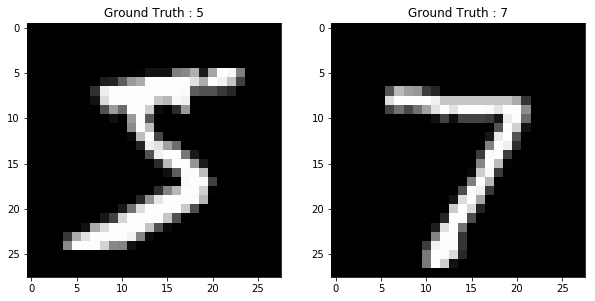

In [190]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])


# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
#import scipy.misc
#scipy.misc.imsave('outfile2.jpg', train_images[41023,:,:])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


In [175]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)


In [6]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [7]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [8]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [9]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.2693 - acc: 0.9168 - val_loss: 0.2091 - val_acc: 0.9375
Epoch 2/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0945 - acc: 0.9707 - val_loss: 0.0972 - val_acc: 0.9686
Epoch 3/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0583 - acc: 0.9815 - val_loss: 0.0859 - val_acc: 0.9744
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0410 - acc: 0.9865 - val_loss: 0.0825 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0304 - acc: 0.9901 - val_loss: 0.0800 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0214 - acc: 0.9931 - val_loss: 0.0891 - val_acc: 0.9781
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.0766 -

Text(0.5,1,'Loss Curves')

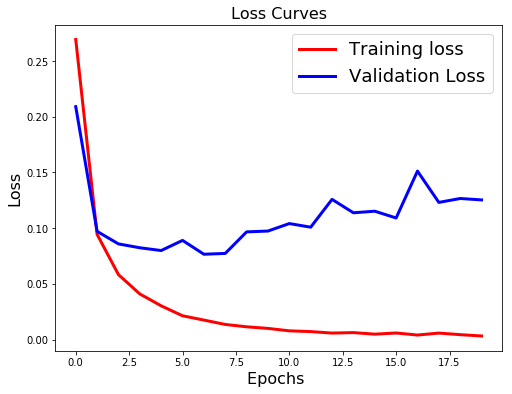

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

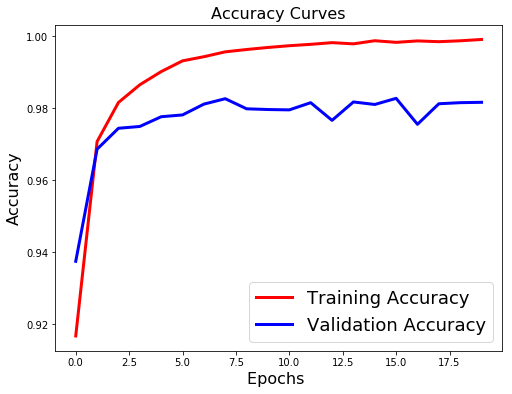

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [16]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s 93us/step


In [17]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.1253777503613971, accuracy = 0.9816


In [21]:
# Predict the probabilities for each class 
model.predict(test_data[[0],:])

array([[  2.71529375e-25,   1.90189836e-23,   1.31566582e-20,
          7.92550795e-17,   5.47336530e-38,   3.53502890e-31,
          0.00000000e+00,   1.00000000e+00,   1.19569364e-22,
          1.77785103e-22]], dtype=float32)

In [20]:
# Predict the most likely class
model.predict_classes(test_data[[0],:])

array([7])

In [47]:
test_data[0].type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [193]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import cv2
import scipy.misc
def testfunction(filename):
    image = cv2.imread(filename)
    resized_image = cv2.resize(image, (28, 28)) 
    def average(pixel):
        return (pixel[0] + pixel[1] + pixel[2])/256

    grey = np.zeros((resized_image.shape[0], resized_image.shape[1])) # init 2D numpy array
    # get row number
    for x in range(len(resized_image)):
        for y in range(len(resized_image[x])):
            grey[x][y]=average(resized_image[x][y])
    dim=(np.prod(grey.shape))  
    test = grey.reshape(1, dim) #dimension 1
    
    fig=plt.figure()
    #plt.plot(d,c1[0:100],'b--',d,c2[0:100],'r--',d,c3[0:100],'g--',figure = fig) 
    #plt.figure(figsize=[10,5])
    # Display the first image in training data
    plt.subplot(121)
    plt.imshow(resized_image, cmap='gray',figure=fig)
    print ("Your Result is",end="") 
    print (model.predict_classes(test))

    #x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)





/Users/zeyang/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


Your Result is[5]
Your Result is[7]
Your Result is[3]
Your Result is[2]
Your Result is[6]
Your Result is[2]


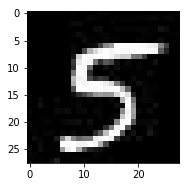

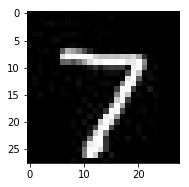

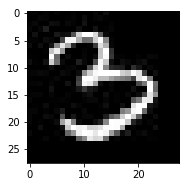

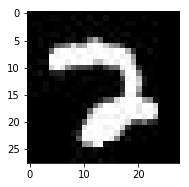

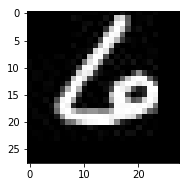

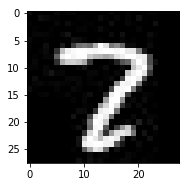

In [194]:
list= ["outfile2.jpg","outfile.jpg","outfile1.jpg","outfile5.jpg","outfile6.jpg","outfile7.jpg"]
for i in list:
    testfunction(i)